# Linear Algebra for Quantum Computing - 2 Qubits

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import linalg
from scipy.linalg import expm
from qiskit import *
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, plot_histogram

In [2]:
def normalize (U):
    Umax, Umin = U.max(), U.min()
    U = (U - Umin)/(Umax - Umin)
    return (U)

#Normalize a complex vector
def normalizeVector(V):
    #Get real parts
    A=V[0].real
    B=V[1].real
    length=math.sqrt(V[0]*np.conj(V[0])+V[1]*np.conj(V[1]))
    V = V/length
    return(V)

def bra(vector):
    vector = np.conj(vector)
    vector = np.transpose(vector)
    return(vector)

## Multi Dimensional Hilbert Space
In quantum information processing, it is usual to work with multiparticle states. So we construct 
a Hilbert space $H$ that is a composite of the independent Hilbert spaces associated with each individual particle/qubit. The mathematical machinery we use is the <b>Kronecker or tensor product</b>. 

Suppose $H_1$ and $H_2$ are the two Hilbert spaces of dimension $N_1$ and $N_2$.We can put these two Hilbert spaces together to construct a larger Hilbert space $H$, as <br>
$H = H_1 ⊗ H_2$

The dimension of this larger Hilbert space is the product of the dimensions of $H_1$ and $H_2$. We assume that <br>
$dim(H_1)=N_1$ and $dim(H_2)=N_2$. Then,<br>
$dim(H) = N_1N_2$

### REPRESENTING COMPOSITE STATES IN QUANTUM MECHANICS
A state vector belonging to $H$ is the tensor product of state vectors belonging to $H_1$ and $H_2$. Let $|\phi> \in H_1$ and $|\chi>	\in H_2$ be two vectors that belong to the Hilbert spaces used to construct $H$. We can construct a vector $|\psi> \in H$ using the tensor product, <br>
$|\psi> = |\phi> ⊗ |\chi>$

The tensor product of two vectors is linear. That is,<br>
$|\phi> ⊗ [|\chi_1> + |\chi_2>] = |\phi> ⊗ |\chi_1> + |\phi> ⊗ |\chi_2>$<br>
$[|\phi_1> + |\phi_2>] ⊗ |\chi> = |\phi_1> ⊗ |\chi> + |\phi_2> ⊗ |\chi>$<br>

Also the tensor product is linear with respect to scalars<br>
$|\phi> ⊗ (\alpha|\chi>) = \alpha|\phi>	 ⊗ |\chi>$<br>

### What about basis?
To construct a basis for the larger Hilbert space, we simply form the tensor products of basis vectors from the spaces $H_1$ and $H_2$. Let the basis of $H_1$  is $|u_i>$ and that of $H_2$ is $|v_i>$. Then we may construct a basis $|w_i>$ for $H$ as<br>
$|w_i>	 = |u_i> ⊗ |v_i>$<br>

The order of the tensor product is not relevant, i.e.,<br>
$|a> ⊗ |b>	= |b> ⊗ |a>$

Since it is cumbersome to write the ⊗ symbol, we simply denote the tensor product $|a> ⊗ |b>$ as $|a>|b>$ or $|ab>$<br>	.



### Computation of Tensor Product
Now if we have two separate qubits, we describe their collective state using the tensor product:
$$ |\psi\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |\phi\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$
$$ 
|\psi\phi\rangle = |\psi\rangle \otimes |\phi\rangle = \begin{bmatrix} a_0 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\ a_1 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_1 b_0 \\ a_1 b_1 \end{bmatrix}
$$

In multi-qubit Hilbert space, we will mostly work with basis<br>
$|0> = \begin{pmatrix} 1\\0 \end{pmatrix}$ and
$|1> = \begin{pmatrix} 0\\1 \end{pmatrix}$<br>
for all the constituent 1-qubit Hilbert spaces.

In [3]:
#we define 1 as
x_1 = 1+0j
#And a 0 as
x_0 = 0+0j

#We define imaginary i as i1 and -i as i_1 as
i1=0+1j
i_1=0-1j

#Hence the basis |0> and |1> are
ket_0 = np.array([x_1, x_0])
ket_1 = np.array([x_0, x_1])

#pauli X, pauliY and pauliZ operators are
pauliX = np.array([[x_0,x_1],[x_1,x_0]])
pauliY = np.array([[x_0,-i1],[i1,x_0]])
pauliZ = np.array([[x_1,x_0],[x_0,-x_1]])

So $\{|0>, |1>\}$ are basis set for both $H_1$ and $H_2$. Hence, basis-set for $H$ will be<br>
$|w_0> = |0> ⊗ |0> = |00>$<br>
$|w_1> = |0> ⊗ |1> = |01>$<br>
$|w_2> = |1> ⊗ |0> = |10>$<br>
$|w_3> = |1> ⊗ |1> = |11>$<br>


In [4]:
basis_H = [0]*4
basis_H1 = [ket_0, ket_1]
basis_H2 = [ket_0, ket_1]
count=0
for bH1 in basis_H1:
    for bH2 in basis_H2:
        basis_H[count] = np.kron(bH1,bH2)
        count=count+1
print(basis_H)        

[array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]), array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]), array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])]


A general form of $|\phi>$ in $H_1$ is<br>
$|\phi> = \sum_i a_i|u_i>$ where $|u_i> = \{|0>,|1>\}$

E:\DevelopmentEnvironments\Anaconda3\envs\qiskit_env\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[0.56568542+0.j         0.70710678+0.42426407j]


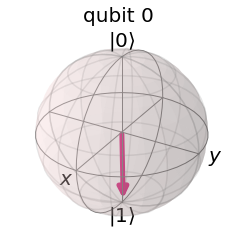

In [5]:
a1 = 4; a2 = 5+3j
phi = a1*ket_0 + a2*ket_1
phi = normalizeVector(phi)
print (phi)
plot_bloch_multivector(phi)

A general form of $|\chi>$ in $H_2$ is<br>
$|\chi> = \sum_i b_i|v_i>$ where $|v_i> = \{|0>,|1>\}$

E:\DevelopmentEnvironments\Anaconda3\envs\qiskit_env\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[0.16384638+0.65538554j 0.73730873+0.j        ]


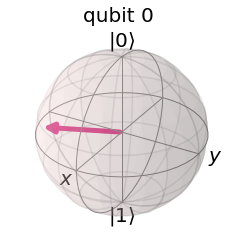

In [6]:
b1 = 2+8j; b2 = 9
chi = b1*ket_0 + b2*ket_1
chi = normalizeVector(chi)
print (chi)
plot_bloch_multivector(chi)

So, now the tensor product of $|\phi>$ and $|\chi>$ is, <br>
$|\psi> = |\phi> ⊗ |\chi>$

[ 0.09268551+0.37074205j  0.4170848 +0.j         -0.16219964+0.53294169j
  0.521356  +0.3128136j ]


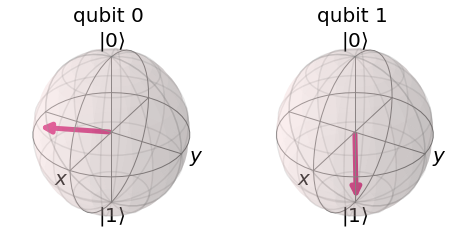

In [7]:
psi = np.kron(phi,chi)
print(psi)
plot_bloch_multivector(psi)

[ 0.09268551+0.37074205j -0.16219964+0.53294169j  0.4170848 +0.j
  0.521356  +0.3128136j ]


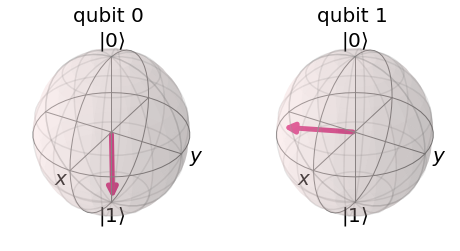

In [8]:
psi = np.kron(chi,phi)
print(psi)
plot_bloch_multivector(psi)

[-0.40268456+0.2147651j   0.12080537+0.48322148j  0.12080537+0.48322148j
  0.54362416+0.j        ]


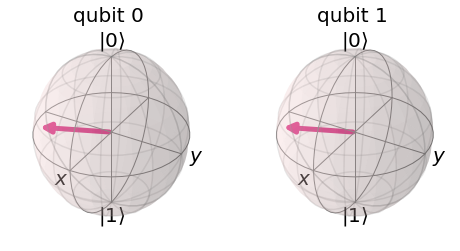

In [9]:
psi = np.kron(chi,chi)
print(psi)
plot_bloch_multivector(psi)